<a href="https://colab.research.google.com/github/pallabm22/Gold_Price_Prediction_ML/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import metrics

In [121]:
dataset=pd.read_csv('gld_price_data.csv')

In [122]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [123]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [124]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [125]:
dataset.shape

(2290, 6)

In [126]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [128]:
X=dataset.drop(['Date','GLD'], axis=1)

In [129]:
Y=dataset['GLD']

In [130]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [131]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [132]:
corelation=dataset.corr()

<ipython-input-132-1aac2045f1fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=dataset.corr()


In [133]:
print(corelation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [134]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


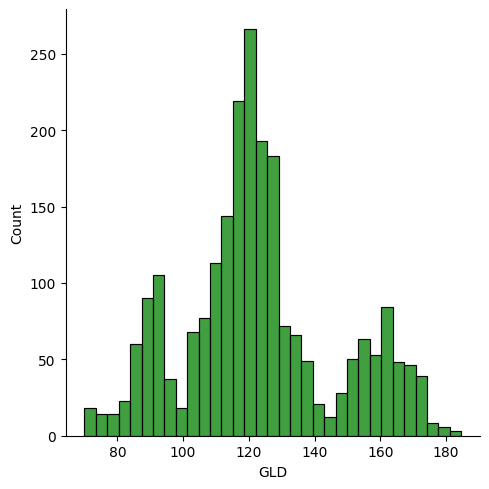

In [135]:
sns.displot(dataset['GLD'],color='green')

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
regressor=RandomForestRegressor()

In [139]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [140]:
X_pred=regressor.predict(X_test)

In [141]:
print(X_pred)

[113.81630047 147.91380115 140.03349831 112.67350181 113.86529916
  95.54849925 111.75149961  93.2869995  120.88110105 127.13079967
 147.81509911 120.6203983  119.0952007   88.21620051  96.08730008
  92.64739872 116.60760094  89.11609906 125.31720085 114.71990013
 118.68329929 152.76220159 122.65579796 120.00500005 171.20609942
 108.49069844 120.46110082  87.13579851  88.1018007   88.4646989
 121.21250058 154.30190146 149.24659926 125.98520022 126.51989983
  90.75789883 157.78609928 121.561802   106.62210099 144.38589714
  92.65689989 127.66110088 117.63490094 152.84080254 119.44129992
  91.37520193  79.54519985 120.21270184 132.99630067 119.06349966
 127.33580039 165.95030013 152.95540108  92.68759978 149.20100024
 152.06459906 112.98570105 112.70310014  87.3457993  127.68859876
 125.13590034 151.97280246 114.50269999 110.65270003 161.15169754
 117.28309863 108.232401   131.59190035 133.16070185 125.47880045
 117.20880045 149.7985026  156.07679961 168.63289546 109.78750089
 140.852397

In [142]:
error_score=metrics.r2_score(Y_test,X_pred)

In [143]:
print(error_score)

0.987899234437714


In [144]:
Y_test = list(Y_test)

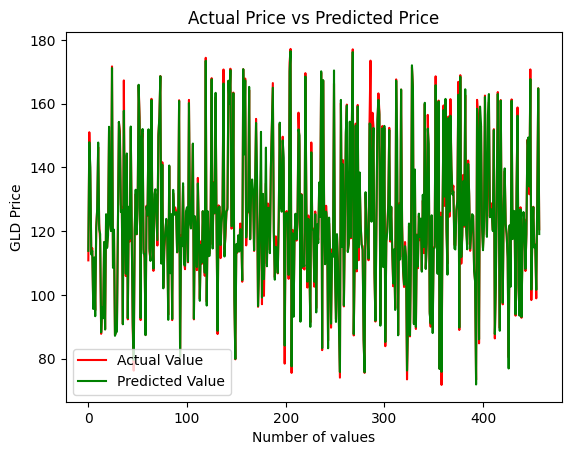

In [146]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(X_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()